In [1]:
import torch
from diffusers import FluxPipeline

In [2]:
path = "pretrained_models/FLUX.1-dev"
pipe = FluxPipeline.from_pretrained(path, torch_dtype=torch.bfloat16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    guidance_scale=0.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

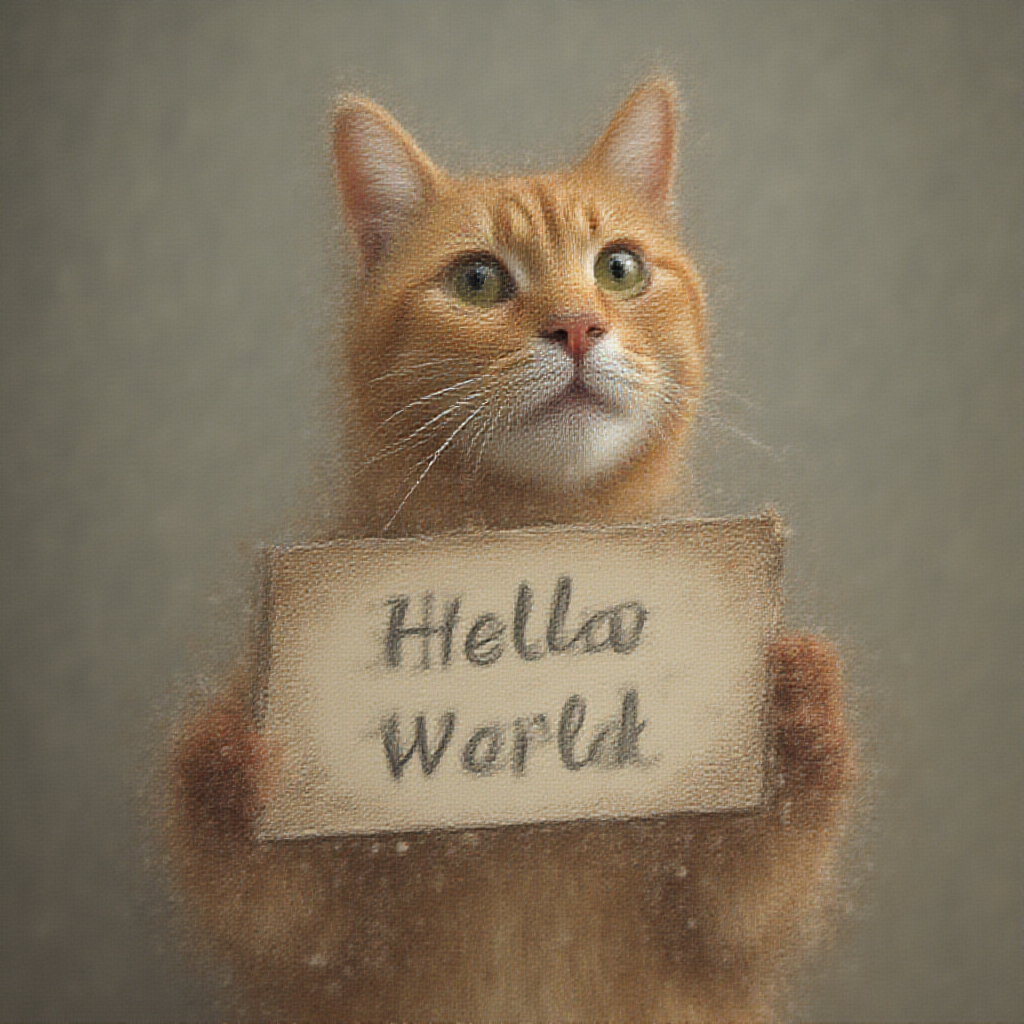

In [4]:
from IPython.display import display
display(image)